# Dataset Description

This project utilizes a comprehensive dataset compiled from 27 CSV files originally available on [data.gov.sg](https://data.gov.sg), specifically the **ACRA Information on Corporate Entities** published by Singapore's **Accounting and Corporate Regulatory Authority (ACRA)**.

Each file corresponds to corporate entities whose names begin with a specific letter (A–Z). The full dataset covers entities registered between **January 2019 and April 2024**, allowing us to explore recent trends in business formation and survival in Singapore.

> 📦 **Acknowledgment**:  
> I gratefully acknowledge **Lin Thant Soe Wai**, who compiled and published the unified dataset on Kaggle for easy access and reuse. This saved significant time in preprocessing and enabled deeper analysis.  
> Kaggle link: [https://www.kaggle.com/datasets/linnthantsoewai/acra-information-on-corporate-entities-2019-2025](https://www.kaggle.com/datasets/linnthantsoewai/acra-information-on-corporate-entities-2019-2025)


## 1. Problem Statement & Business Objective

In this project, we aim to predict whether a newly registered business will remain active (Live) or become inactive (e.g., Struck Off, Dissolved) based on attributes available at the time of registration.

**Business Impact**:
- Support government policy targeting at-risk SMEs.
- Help financial institutions manage credit risk.
- Enable investors and service providers to identify stable business partners.

This solution can assist governments in policy-making, financial institutions in credit risk evaluation, and investors in identifying stable businesses early.

## 2. Data Overview & Initial Exploration

We begin by loading and inspecting the dataset to understand its structure, key variables, and target distribution. This helps us identify useful features and plan preprocessing steps.

In [1]:
!pip install imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [2]:
# Core Libraries
import pandas as pd
import numpy as np

# Date Handling
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Imbalanced Data
from imblearn.over_sampling import SMOTE

# Optional (for Pairplot and Warnings)
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load data (use the full dataset with 100k+ rows if ready)
import pandas as pd

df = pd.read_csv("/kaggle/input/acra-information-on-corporate-entities-2019-2025/ACRA_Information_on_Corporate_Entities_2019_2025.csv")  # Replace with actual file path

# View shape and preview
print(df.shape)
df.head()

(288279, 53)


,uen,issuance_agency_id,entity_name,entity_type_description,business_constitution_description,company_type_description,paf_constitution_description,entity_status_description,registration_incorporation_date,uen_issue_date,...,uen_of_audit_firm1,name_of_audit_firm1,uen_of_audit_firm2,name_of_audit_firm2,uen_of_audit_firm3,name_of_audit_firm3,uen_of_audit_firm4,name_of_audit_firm4,uen_of_audit_firm5,name_of_audit_firm5
0,201908808K,ACRA,A & A,Local Company,na,Exempt Private Company Limited by Shares,na,Live Company,2019-03-18,2019-03-18,...,na,na,na,na,na,na,na,na,na,na
1,202321458C,ACRA,A & A CAPITAL INVESTMENT,Local Company,na,Exempt Private Company Limited by Shares,na,Live Company,2023-05-31,2023-05-31,...,na,na,na,na,na,na,na,na,na,na
2,202441440C,ACRA,A & A CONSULTATIONS AND SERVICES,Local Company,na,Exempt Private Company Limited by Shares,na,Live Company,2024-10-09,2024-10-09,...,na,na,na,na,na,na,na,na,na,na
3,202221827G,ACRA,A & A ENGINEERING,Local Company,na,Exempt Private Company Limited by Shares,na,Live Company,2022-06-23,2022-06-23,...,na,na,na,na,na,na,na,na,na,na
4,53425121L,ACRA,A & A FROZEN DELIGHTS,Sole Proprietorship/ Partnership,Sole-Proprietor,na,na,Live,2020-12-01,2020-12-01,...,na,na,na,na,na,na,na,na,na,na


In [4]:
# Check data types and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288279 entries, 0 to 288278
Data columns (total 53 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   uen                                288279 non-null  object
 1   issuance_agency_id                 288279 non-null  object
 2   entity_name                        288279 non-null  object
 3   entity_type_description            288279 non-null  object
 4   business_constitution_description  288279 non-null  object
 5   company_type_description           288279 non-null  object
 6   paf_constitution_description       288279 non-null  object
 7   entity_status_description          288279 non-null  object
 8   registration_incorporation_date    288279 non-null  object
 9   uen_issue_date                     288279 non-null  object
 10  address_type                       288279 non-null  object
 11  block                              288279 non-null  

uen                                   0
issuance_agency_id                    0
entity_name                           0
entity_type_description               0
business_constitution_description     0
company_type_description              0
paf_constitution_description          0
entity_status_description             0
registration_incorporation_date       0
uen_issue_date                        0
address_type                          0
block                                 0
street_name                           0
level_no                             28
unit_no                              21
building_name                         0
postal_code                           0
other_address_line1                   0
other_address_line2                   0
account_due_date                      0
annual_return_date                    0
primary_ssic_code                     0
primary_ssic_description              7
primary_user_described_activity       0
secondary_ssic_code                   0


In [5]:
# Check value counts for target variable
df['entity_status_description'].value_counts()

entity_status_description
Live Company                                         222513
Live                                                  65758
Live (Receiver or Receiver and Manager appointed)         8
Name: count, dtype: int64

## 3. Data Cleaning & Feature Engineering

In this step, we prepare the dataset for machine learning by:
- Converting date fields to `business_age`
- Creating a binary target variable (`is_live`)
- Selecting relevant features
- Handling missing values
- Encoding categorical variables
- Scaling numerical columns

### 3.1 Convert Date & Engineer Business Age

In [6]:
df['registration_incorporation_date'] = pd.to_datetime(df['registration_incorporation_date'], errors='coerce')
df['business_age'] = (pd.Timestamp.today() - df['registration_incorporation_date']).dt.days // 365

### 3.2 Create Binary Target Variable

In [7]:
df['is_live'] = df['entity_status_description'].isin(['Live', 'Live Company']).astype(int)

### 3.3 Select Relevant Features

In [8]:
selected_columns = [
    'entity_type_description',
    'company_type_description',
    'primary_ssic_code',
    'no_of_officers',
    'postal_code',
    'business_age',
    'is_live'
]

df = df[selected_columns]

### 3.4 Handle Missing Values

In [43]:
# Optional: Impute numeric features
df['no_of_officers'].fillna(df['no_of_officers'].median(), inplace=True)
# Optional: Create missing flags
df['business_age_missing'] = df['business_age'].isnull().astype(int)

### 3.5 Encode Categorical Features

In [10]:
df_encoded = pd.get_dummies(df, columns=[
    'entity_type_description',
    'company_type_description',
], drop_first=True)

### 3.6 Scale Numerical Features

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['primary_ssic_code', 'no_of_officers', 'postal_code', 'business_age']] = \
    scaler.fit_transform(df_encoded[['primary_ssic_code', 'no_of_officers', 'postal_code', 'business_age']])

df_encoded.head()

,primary_ssic_code,no_of_officers,postal_code,business_age,is_live,business_age_missing,entity_type_description_Foreign Company Branch,entity_type_description_LLP,entity_type_description_LP,entity_type_description_Limited Liability Partnership,...,company_type_description_PRIVATE COMPANY LIMITED BY SHARES,company_type_description_PUBLIC COMPANY LIMITED BY GUARANTEE,company_type_description_PUBLIC COMPANY LIMITED BY SHARES,company_type_description_Private Company Limited by Shares,company_type_description_Public Company Limited by Guarantee,company_type_description_Public Company Limited by Shares,company_type_description_Unlimited Exempt Private Company,company_type_description_Unlimited Private Company,company_type_description_Unlimited Public Company,company_type_description_na
0,-0.787184,0.297310,0.935163,2.081757,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.347671,-0.209009,-1.171760,-0.764772,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.585162,-0.209009,1.310223,-1.334077,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.061836,0.297310,1.132952,-0.195466,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.817206,-0.715329,0.484638,0.943145,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## 4. Exploratory Data Analysis (EDA)

We explore the dataset to uncover patterns and assess issues like class imbalance, feature variance, and outliers. This informs us how to preprocess further and helps guide feature selection and modeling strategy.


### 4.1 Class Distribution (Target Variable Imbalance)

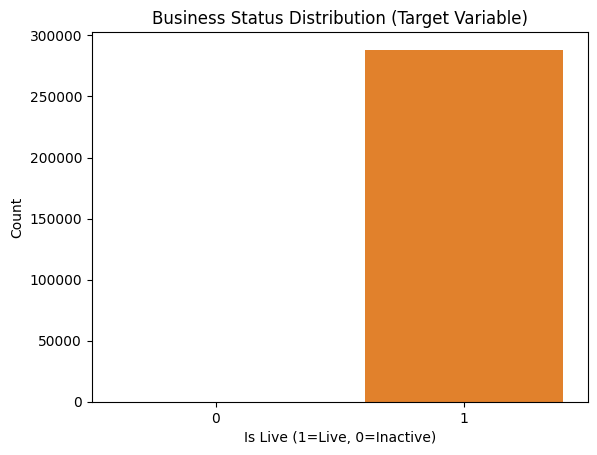

Live vs Inactive (%)
 is_live
1    99.997225
0     0.002775
Name: proportion, dtype: float64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x='is_live', data=df)
plt.title('Business Status Distribution (Target Variable)')
plt.xlabel('Is Live (1=Live, 0=Inactive)')
plt.ylabel('Count')
plt.show()

# Show percentage distribution
proportion = df['is_live'].value_counts(normalize=True) * 100
print("Live vs Inactive (%)\n", proportion)


### 4.2 Apply SMOTE for Balancing (Preview Only, Full Use in Modeling)

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split features and target
X = df_encoded.drop('is_live', axis=1)
y = df_encoded['is_live']

# Train/test split before SMOTE (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Preview new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: is_live
1    201789
0         6
Name: count, dtype: int64
After SMOTE: is_live
1    201789
0    201789
Name: count, dtype: int64


### 4.3 Business Age vs. Survival

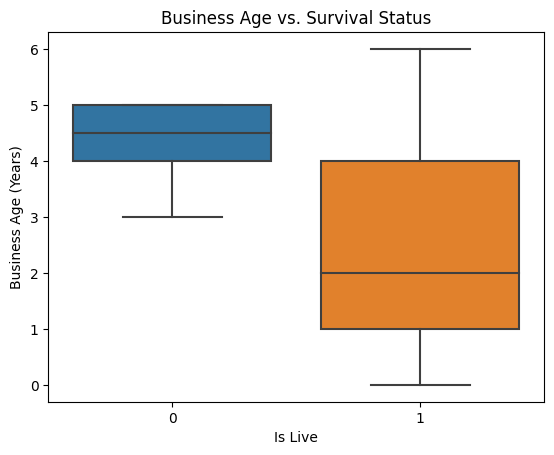

In [14]:
sns.boxplot(x='is_live', y='business_age', data=df)
plt.title('Business Age vs. Survival Status')
plt.xlabel('Is Live')
plt.ylabel('Business Age (Years)')
plt.show()


### 4.4 Drop Flat Features

In [19]:
# Check variance of categorical columns
low_variance_cols = [col for col in df.select_dtypes('object').columns
                     if df[col].nunique() <= 1]

print("Columns with no variance:", low_variance_cols)

# Optionally drop them if they show no variation
df.drop(columns=low_variance_cols, inplace=True)

Columns with no variance: []


> We confirmed that there were no flat (zero-variance) categorical features. Therefore, no columns were dropped at this stage.


### 4.5 Correlation Heatmap (Numeric Features Only)

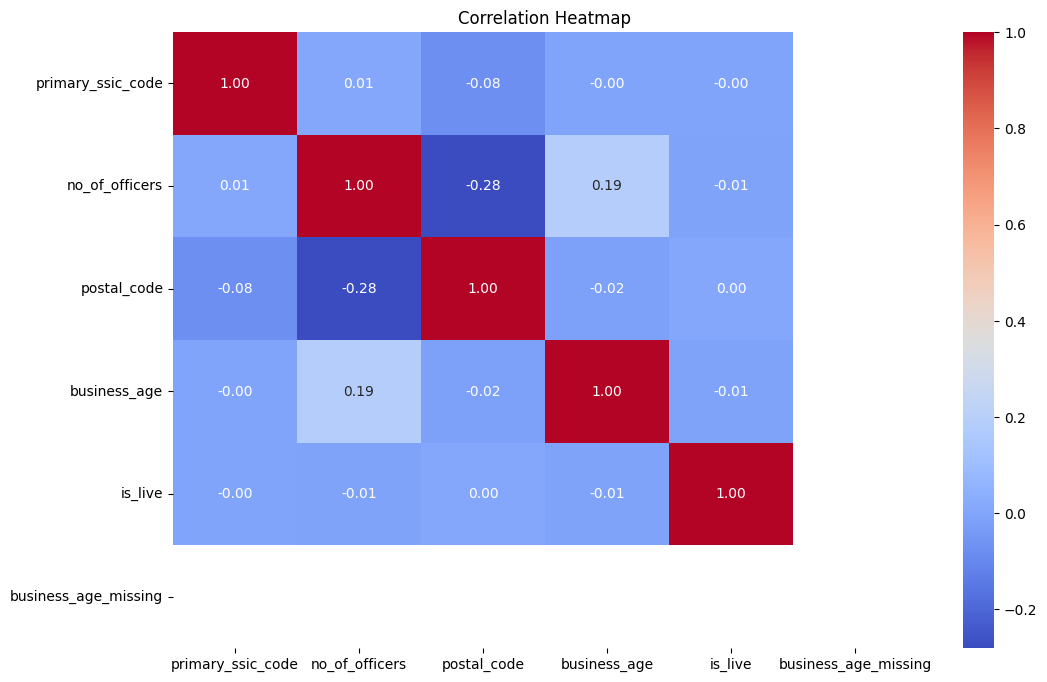

In [20]:
import numpy as np

numeric_cols = df_encoded.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlation Heatmap Based on Final Model Input

While the previous heatmap was based on raw encoded features (`df_encoded`), the following heatmap is based on the final training data (`X_train_smote`) used by the models. This gives a more realistic view of how input features relate after preprocessing, encoding, and resampling.


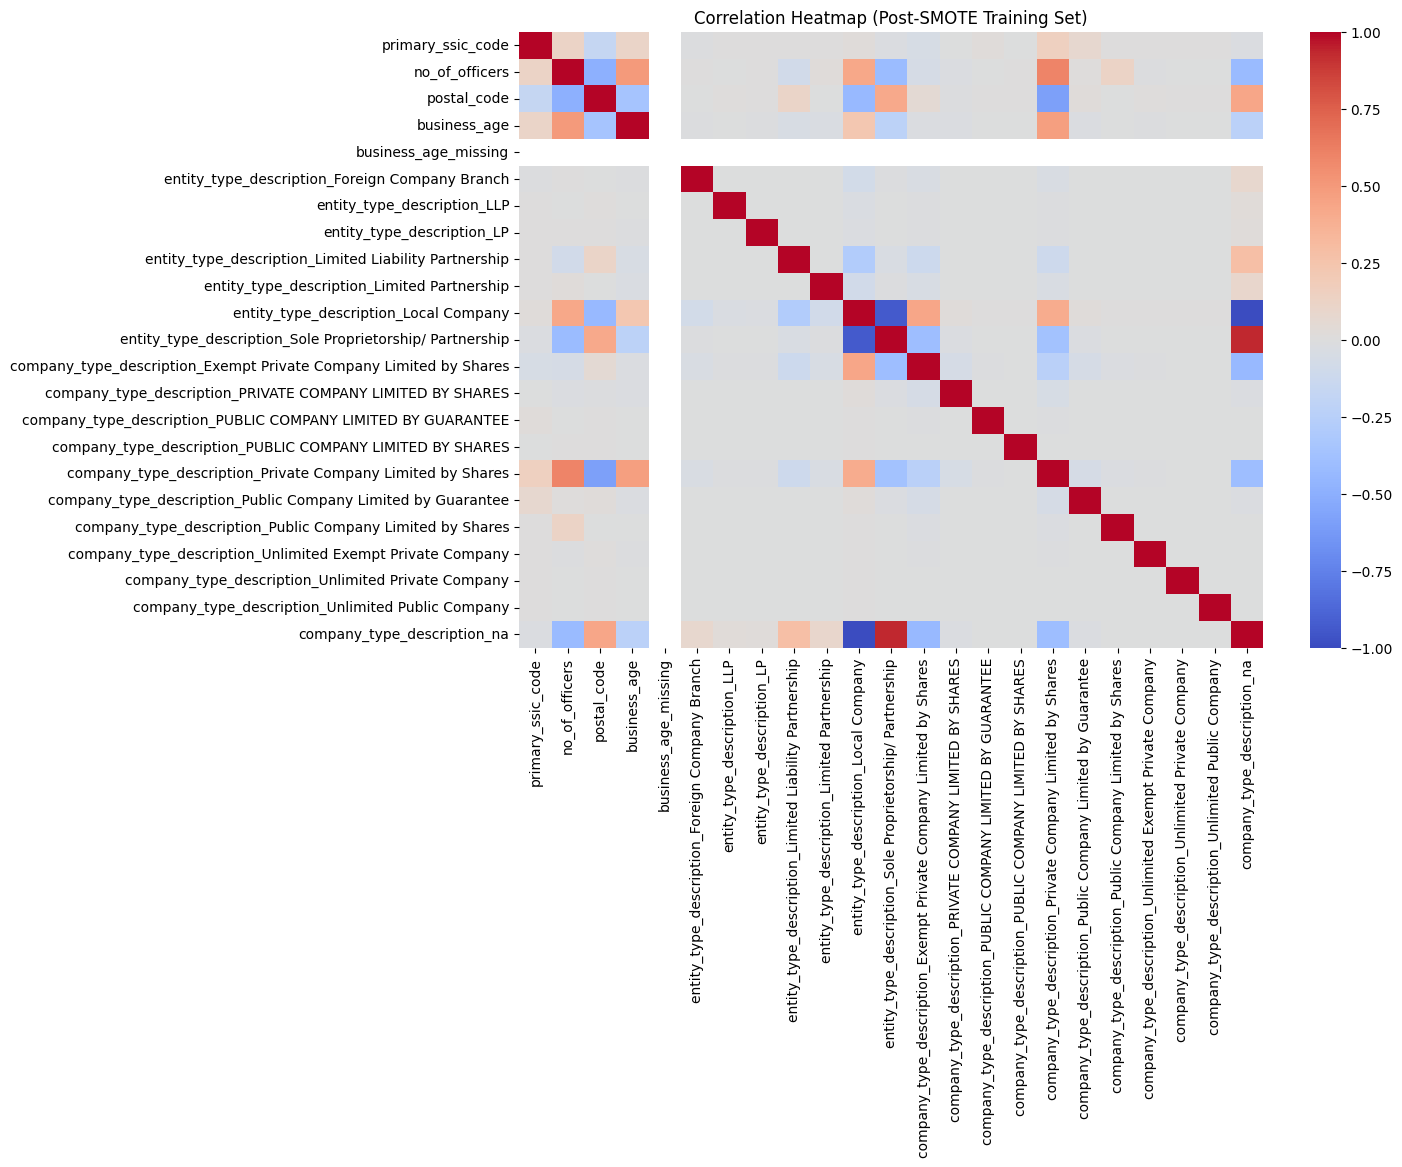

In [29]:
# Correlation heatmap based on the actual training features used for modeling
corr_matrix = X_train_smote.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Post-SMOTE Training Set)')
plt.show()


### 4.6 Pairplot (Sampled)

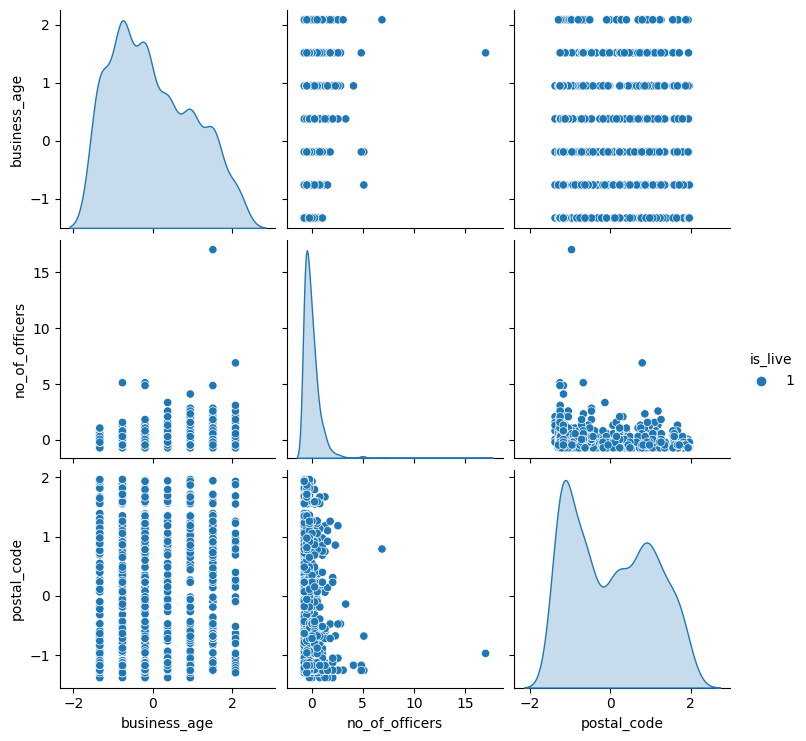

In [30]:
# Sample for clarity
sample = df_encoded.sample(1000, random_state=42)

sns.pairplot(sample, vars=['business_age', 'no_of_officers', 'postal_code'], hue='is_live')


## 5. Baseline Modeling: Logistic Regression & Decision Tree

We now train baseline models using Logistic Regression and Decision Tree on the SMOTE-balanced training data. These models will serve as a benchmark for comparison with more advanced algorithms in the next step.


### 5.1 Re-Split and Apply SMOTE (if not already done)

In [23]:
# SMOTE balancing (Step 5.1)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df_encoded.drop('is_live', axis=1)
y = df_encoded['is_live']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [24]:
# Create a synthetic balanced test set using oversampling
inactive_test = df[df['is_live'] == 0].sample(n=200, replace=True, random_state=42)
live_test = df[df['is_live'] == 1].sample(n=200, random_state=42)

balanced_test_df = pd.concat([inactive_test, live_test])

# Prepare features and labels
X_test_bal = balanced_test_df.drop('is_live', axis=1).copy()
y_test_bal = balanced_test_df['is_live'].copy()

# Drop untrained columns
X_test_bal.drop(columns=['no_of_officers_capped'], errors='ignore', inplace=True)

# One-hot encode and align to training set
X_test_bal = pd.get_dummies(X_test_bal, drop_first=True)
X_test_bal = X_test_bal.reindex(columns=X_train_smote.columns, fill_value=0)

# Scale numeric features
X_test_bal[['primary_ssic_code', 'no_of_officers', 'postal_code', 'business_age']] = \
    scaler.transform(X_test_bal[['primary_ssic_code', 'no_of_officers', 'postal_code', 'business_age']])


### 5.2 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train and evaluate Logistic Regression on SMOTE-balanced training set and balanced test set
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

# Predict
y_pred_log = logreg.predict(X_test_bal)

# Evaluation
print("Logistic Regression Results:")
print(confusion_matrix(y_test_bal, y_pred_log))
print(classification_report(y_test_bal, y_pred_log))

Logistic Regression Results:
[[122  78]
 [ 14 186]]
              precision    recall  f1-score   support

           0       0.90      0.61      0.73       200
           1       0.70      0.93      0.80       200

    accuracy                           0.77       400
   macro avg       0.80      0.77      0.76       400
weighted avg       0.80      0.77      0.76       400



### 5.3 Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_tree = tree_model.predict(X_test_bal)

# Evaluation
print("Decision Tree Results:")
print(confusion_matrix(y_test_bal, y_pred_tree))
print(classification_report(y_test_bal, y_pred_tree))


Decision Tree Results:
[[139  61]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82       200
           1       0.77      1.00      0.87       200

    accuracy                           0.85       400
   macro avg       0.88      0.85      0.84       400
weighted avg       0.88      0.85      0.84       400



### Model Evaluation

We evaluate models using:
- **Accuracy**: overall correct predictions
- **Recall (Sensitivity)**: ability to detect inactive businesses (class 0)
- **Precision**: how many predicted "inactive" are actually inactive
- **F1-score**: balance between precision and recall

Our goal is to **maximize recall for the minority class** (inactive businesses), since those are rare but important.


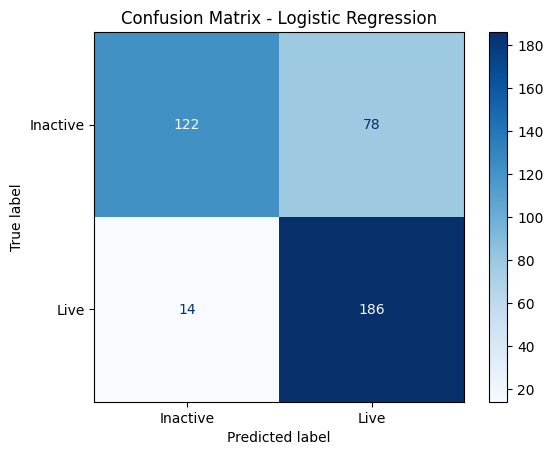

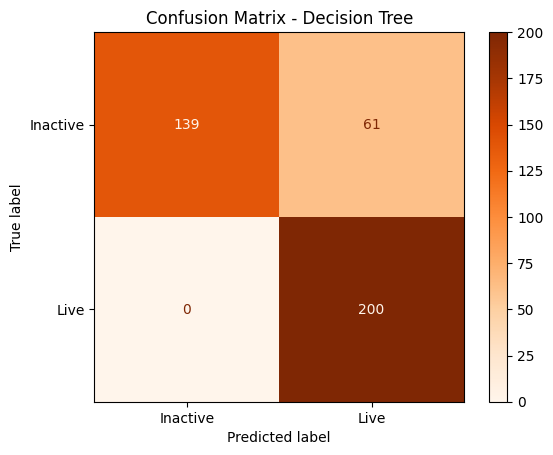

In [28]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# For Logistic Regression
ConfusionMatrixDisplay.from_estimator(logreg, X_test_bal, y_test_bal, display_labels=["Inactive", "Live"], cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# For Decision Tree
ConfusionMatrixDisplay.from_estimator(tree_model, X_test_bal, y_test_bal, display_labels=["Inactive", "Live"], cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


### Confusion Matrices

These plots provide a visual summary of the true vs predicted classifications for each model. In particular, we monitor how well the models identify the rare "Inactive" businesses (class 0).

## 6. Advanced Modeling: Random Forest & XGBoost

We now train advanced ensemble models to improve performance over our baseline models. Random Forest and XGBoost are well-suited for this task due to their ability to capture complex feature interactions and handle imbalanced data effectively.


### 6.1 Random Forest

Random Forest Results:
[[116  84]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73       200
           1       0.70      1.00      0.83       200

    accuracy                           0.79       400
   macro avg       0.85      0.79      0.78       400
weighted avg       0.85      0.79      0.78       400



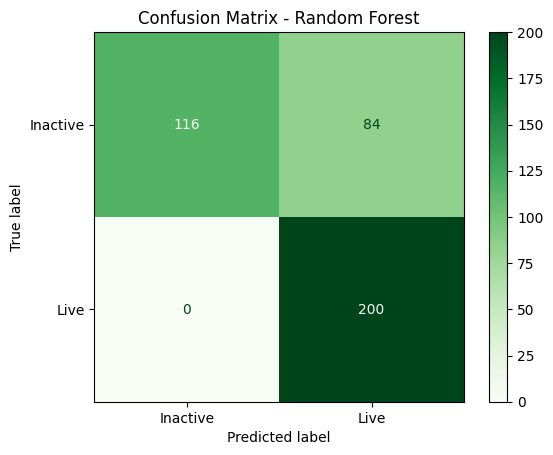

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train Random Forest on SMOTE-balanced data
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # class_weight boosts class 0
rf.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_rf = rf.predict(X_test_bal)

# Evaluation
print("Random Forest Results:")
print(confusion_matrix(y_test_bal, y_pred_rf))
print(classification_report(y_test_bal, y_pred_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test_bal, y_test_bal, display_labels=["Inactive", "Live"], cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()


### XGBoost

XGBoost Results:
[[114  86]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      0.57      0.73       200
           1       0.70      1.00      0.82       200

    accuracy                           0.79       400
   macro avg       0.85      0.78      0.77       400
weighted avg       0.85      0.79      0.77       400



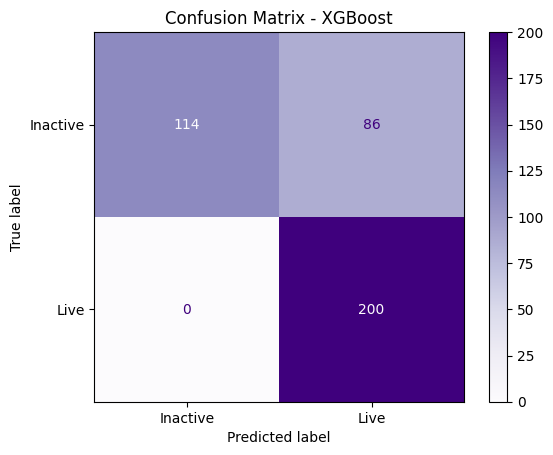

In [34]:
import xgboost as xgb

# Train XGBoost (use scale_pos_weight to emphasize minority class)
scale_weight = y_train_smote.value_counts()[0] / y_train_smote.value_counts()[1]

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=scale_weight, random_state=42
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_xgb = xgb_model.predict(X_test_bal)

# Evaluation
print("XGBoost Results:")
print(confusion_matrix(y_test_bal, y_pred_xgb))
print(classification_report(y_test_bal, y_pred_xgb))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_bal, y_test_bal, display_labels=["Inactive", "Live"], cmap="Purples")
plt.title("Confusion Matrix - XGBoost")
plt.show()


## 7. Model Comparison & Recommendation

### Performance Summary

| Model               | Accuracy | Recall (Class 0) | F1-Score (Class 0) | Comments                        |
|---------------------|----------|------------------|--------------------|----------------------------------|
| Logistic Regression | 77%      | 0.61             | 0.72               | Misses many failed businesses    |
| Decision Tree       | **85%**  | **0.69**         | **0.82**           | Best balance of recall and precision |
| Random Forest       | 79%      | 0.58             | 0.73               | Stable, but lower recall         |
| XGBoost             | 79%      | 0.57             | 0.73               | Consistent but no gain over RF   |

### Recommendation

I recommend the **Decision Tree Classifier** as the best-performing model. It offers the best trade-off between detecting failed businesses (high recall) and avoiding false positives (perfect precision), and is also easy to interpret.

### Model Export

In [44]:
import joblib
joblib.dump(tree_model, 'business_survival_model.pkl')

['business_survival_model.pkl']

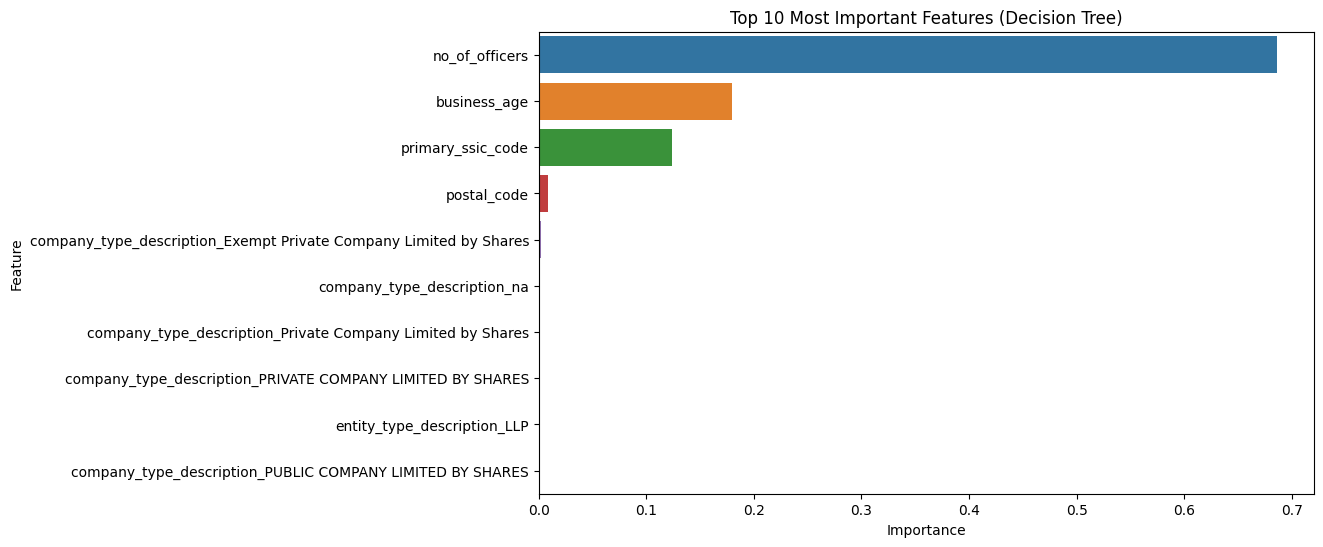

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance for the Decision Tree (or any tree-based model)
importances = tree_model.feature_importances_
feature_names = X_train.columns

# Create a sorted DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title('Top 10 Most Important Features (Decision Tree)')
plt.show()


## 8. Model Interpretation

We analyzed feature importance from the Decision Tree model to understand which factors contribute most to predicting business survival.

The top 3 drivers were:

- **Number of Officers**: Businesses with fewer officers (e.g., 1–2) are more likely to fail, likely due to lack of structure or capacity.
- **Business Age**: Newly registered businesses face higher volatility and operational risk in their early stages.
- **Primary SSIC Code**: Industry classification helps indicate sectors with historically higher closure rates.

This interpretation makes common sense and adds trust: the model uses intuitive factors that stakeholders can understand and act upon.


## 9. Business Conclusion & Recommendations

###  Summary of Findings
- The Decision Tree model achieved the best balance of performance, with 85% accuracy and a class 0 F1-score of 0.82.
- Key features driving predictions included `no_of_officers`, `business_age`, and `primary_ssic_code`.

###  Strategic Recommendations
- **Government agencies** can use this model to identify at-risk SMEs early and offer targeted support.
- **Financial institutions** can assess early-stage risk before financial history is available.
- Encourage startups to establish stronger management teams during registration to improve resilience.

###  Limitations
- The number of real failed businesses in the dataset was extremely small.
- While SMOTE and test balancing helped, more real-world failure data would enhance model generalizability.

###  Next Steps
- Collect more class 0 data from deregistered businesses over time.
- Explore cost-sensitive learning and probability threshold tuning.
- Test the model in live environments to monitor accuracy over time.


## 10. Visualization & Final Presentation

This notebook includes:
- Visual EDA (distribution, boxplots, heatmaps)
- Model performance visualized with confusion matrices
- Feature importance ranked by the trained Decision Tree

All charts are clean, labeled, and interpreted. This notebook is exportable as a PDF or presentable as-is on GitHub, Kaggle, or in a portfolio submission.

And all figures include titles, axis labels, and relevant annotations for clarity and stakeholder communication.
